In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import eurec4a
import xarray as xr

#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

params = {
#"figure.figsize" :  [3.36, 2.976],  # figure size in inches
#                       "figure.dpi"     :  300,       # figure dots per inch
#                       "font.size"      :  8,       # this one acutally changes tick labels
#                       "font.family"    : "Times New Roman",
                      'svg.fonttype'    : 'none',  # plot text as text - not paths or clones or other nonsense
                       'svg.fonttype'    : 'none',  # plot text as text - not paths or clones or other nonsense
                       "ytick.labelsize": 8, # for colorbar ticks
                       "xtick.labelsize": 8, 
                       "axes.labelsize" : 8, # for colorbar labels
}

plt.rcParams.update(params)

In [3]:
# pip install eurec4a intake xarray intake-xarray zarr dask requests
# see https://howto.eurec4a.eu

cat = eurec4a.get_intake_catalog()
botany_cat = cat.simulations.DALES.botany

ds_timeseries = botany_cat.dx100m.nx1536['timeseries'].to_dask()
ds_profiles   = botany_cat.dx100m.nx1536['profiles'].to_dask()
ds_cross      = botany_cat.dx100m.nx1536['cross_xy'].to_dask()
ds_2D         = botany_cat.dx100m.nx1536['2D'].to_dask()
ds_3D         = botany_cat.dx100m.nx1536['3D'].to_dask()

# dimensions: ensemble_member, time, [z, y, x]

In [4]:
def nightshade(ax):
    # shade the local night - 18..06 in local time 
    offset = -58/360 * 24  # domain is at 58 deg W = UTC-4. 
    for n in range(-1,8):
        fr = 18   - offset + n*24
        to = 24+6 - offset + n*24
        ax.axvspan(fr, to, color='0.93', zorder=-20)


In [5]:
start_time = np.datetime64('2020-02-01')
# convert datetime64 to hours since simulation started
def to_hours(t64):
    return (t64 - start_time) / np.timedelta64(1, 'h')

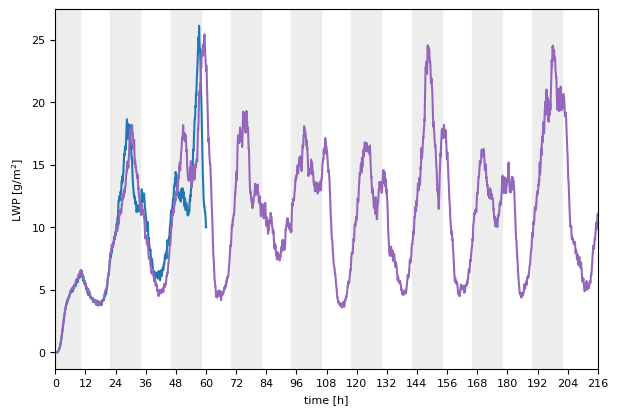

In [11]:
path = "/archive/work_F/weather_simulation/2023 Cloud Botany Data/"
#path = "/home/fjansson/t/1536_longer/"
tmser = xr.open_dataset(path+'run_1-long-tmser.001.nc')

plt.figure(figsize=(7, 7*2/3))
# add run_1 from the dataset - a different realization
hours = to_hours(ds_timeseries['time'])
plt.plot(hours, 1000*ds_timeseries.sel(member=1)['lwp_bar'])

# plot long run_1
time = to_hours(tmser.time)
plt.plot(time, 1000*tmser.lwp_bar, 'tab:purple')
#plt.plot(time, tmser_cnstsun.lwp_bar)

nightshade(plt.gca())
plt.xlabel('time [h]')
plt.ylabel('LWP [g/m$^2$]')
plt.xlim((0,216))
plt.gca().xaxis.set_ticks(np.arange(0, 228, 12))
plt.savefig('run-1-long.pdf')
